# Declaration of Originality

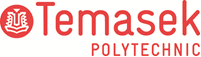

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [71]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully!")

All libraries imported successfully!


# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [72]:
# Read the file from your 'archive' folder
df = pd.read_csv('archive/Churn_Modelling.csv')

%matplotlib inline

# Look at the data to make sure it's all there
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2.2 Summary Statistics

In [73]:
## Understand the type of variable for each column
# 1. Check data types and for missing values (Non-Null Count)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [74]:
# Check for missing data
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Thought Process:
After running df.info() and df.isnull().sum(), I confirmed that there are zero missing values across all 10,000 rows.

Since there are no missing data, I do not have to clean up the dataset. This reduces the risk for biased models or errors during training process.

With a clean dataset, I can now move on to describing the Data Distribution to understand the typical profile of our bank's customers such as average age and balance

In [75]:

# Get a statistical overview of numerical columns
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

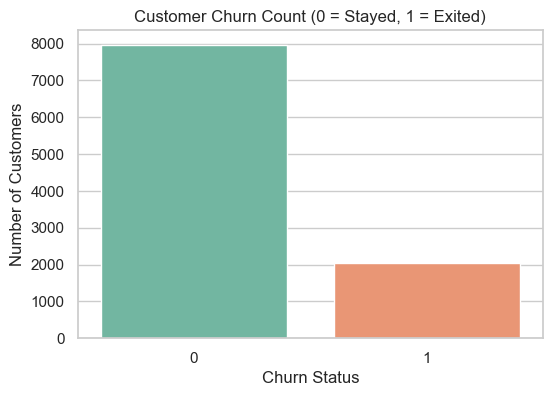

In [76]:
## Understanding distribution of target
# Create a count plot for the target variable 'Exited'
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, hue='Exited', palette='Set2', legend=False)

# Adding meaningful titles and labels for the presentation
plt.title('Customer Churn Count (0 = Stayed, 1 = Exited)')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

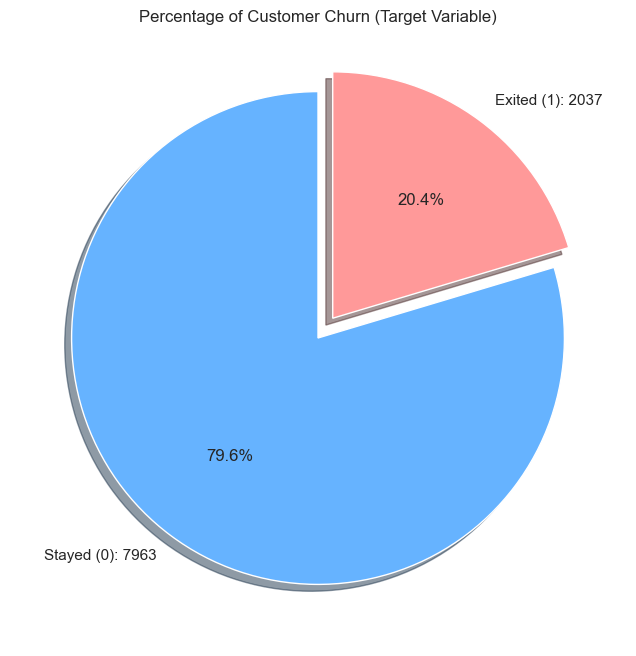

In [77]:
# Check class balance with a pie chart
plt.figure(figsize=(8, 8))

# Define labels and counts
counts = df['Exited'].value_counts()
labels = [f'Stayed (0): {counts[0]}', f'Exited (1): {counts[1]}']

# Plotting the data
plt.pie(
    counts, 
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    shadow=True, 
    colors=['#66b3ff','#ff9999'],
    labels=labels,
    startangle=90
)

plt.title('Percentage of Customer Churn (Target Variable)')
plt.show()

### Observation:
The pie chart reveals a significant Class Imbalance. Approximately 20.4% of customers have exited, while 79.6% have remained with the bank.

### Rationale for Action:
Despite having such a big difference, I have chosen to work with this imbalanced data. Even though this almost 80/20 split represents the true operational environment of the bank. I strongly believe that if the model trains on a realistic distribution, it will be more robust when deployed.

If I were to undersample to reach 50/50, I would be throwing away valuable data from 6,000 customers who stayed. So to prevent the model from becoming biased toward the majority class, I will use scikit-learn’s built-in class_weight='balanced' parameter during the modeling phase. This instructs the algorithm to penalize mistakes on the "Exited" group more heavily.

I will prioritize Recall and the F1-Score over just accuracy. For the Early Warning System, it is much more costly to miss a 'False Negative' than a 'False Positive'

### 2.3.1.2 Understanding distribution of features

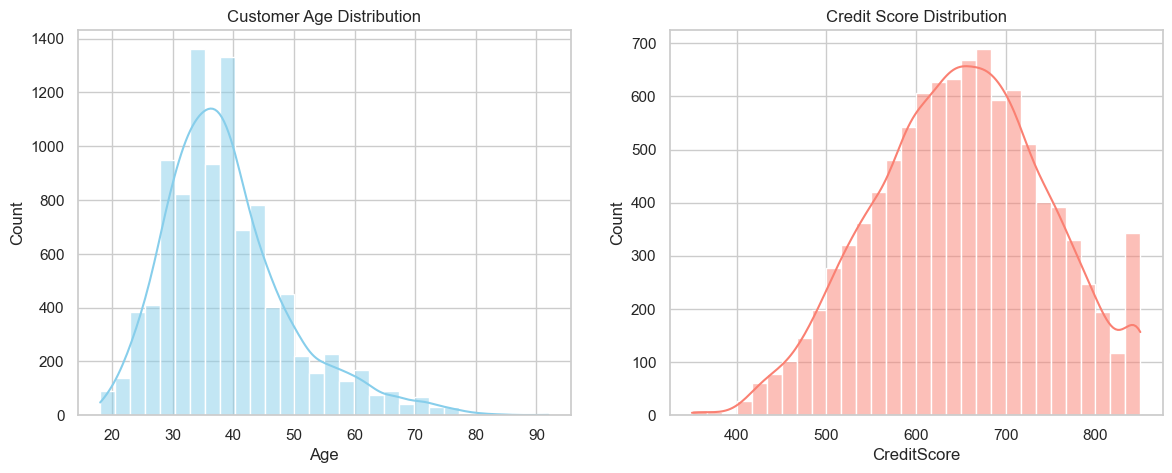

In [78]:
## Understanding distribution of features
# Setting up a figure with two charts side-by-side
plt.figure(figsize=(14, 5))

# Chart 1: Age - Is the bank mainly targeted towards young people or seniors?
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Customer Age Distribution')

# Chart 2: Credit Score - Are the customers financially healthy?
plt.subplot(1, 2, 2)
sns.histplot(df['CreditScore'], bins=30, kde=True, color='salmon')
plt.title('Credit Score Distribution')

plt.show()


## Thought Process & Data Analysis: Feature Distribution

### Analysis of Customer Age Distribution:
Observation: The age distribution follows a slightly right-skewed normal distribution, with a heavy concentration of customers in the 30 to 45 age bracket.

Business Insight: Our primary customer base consists of working-age adults. We need to investigate if churn is higher among the younger demographic (early career) or older demographic (retirement planning), as their banking needs differ significantly.

### Analysis of Credit Score Distribution:
Observation: Most customers have a credit score between 600 and 700, showing a financially healthy population. There is a visible spike at the maximum credit score (850), indicating a segment of "perfect-score" elite customers.

Business Insight: The bank attracts high-value, low-risk individuals. As a founder, identifying if the top-tier credit score holders are leaving is vital, as losing these customers represents a significant loss in potential loan revenue and trust.

### 2.3.2 Understanding relationship between variables

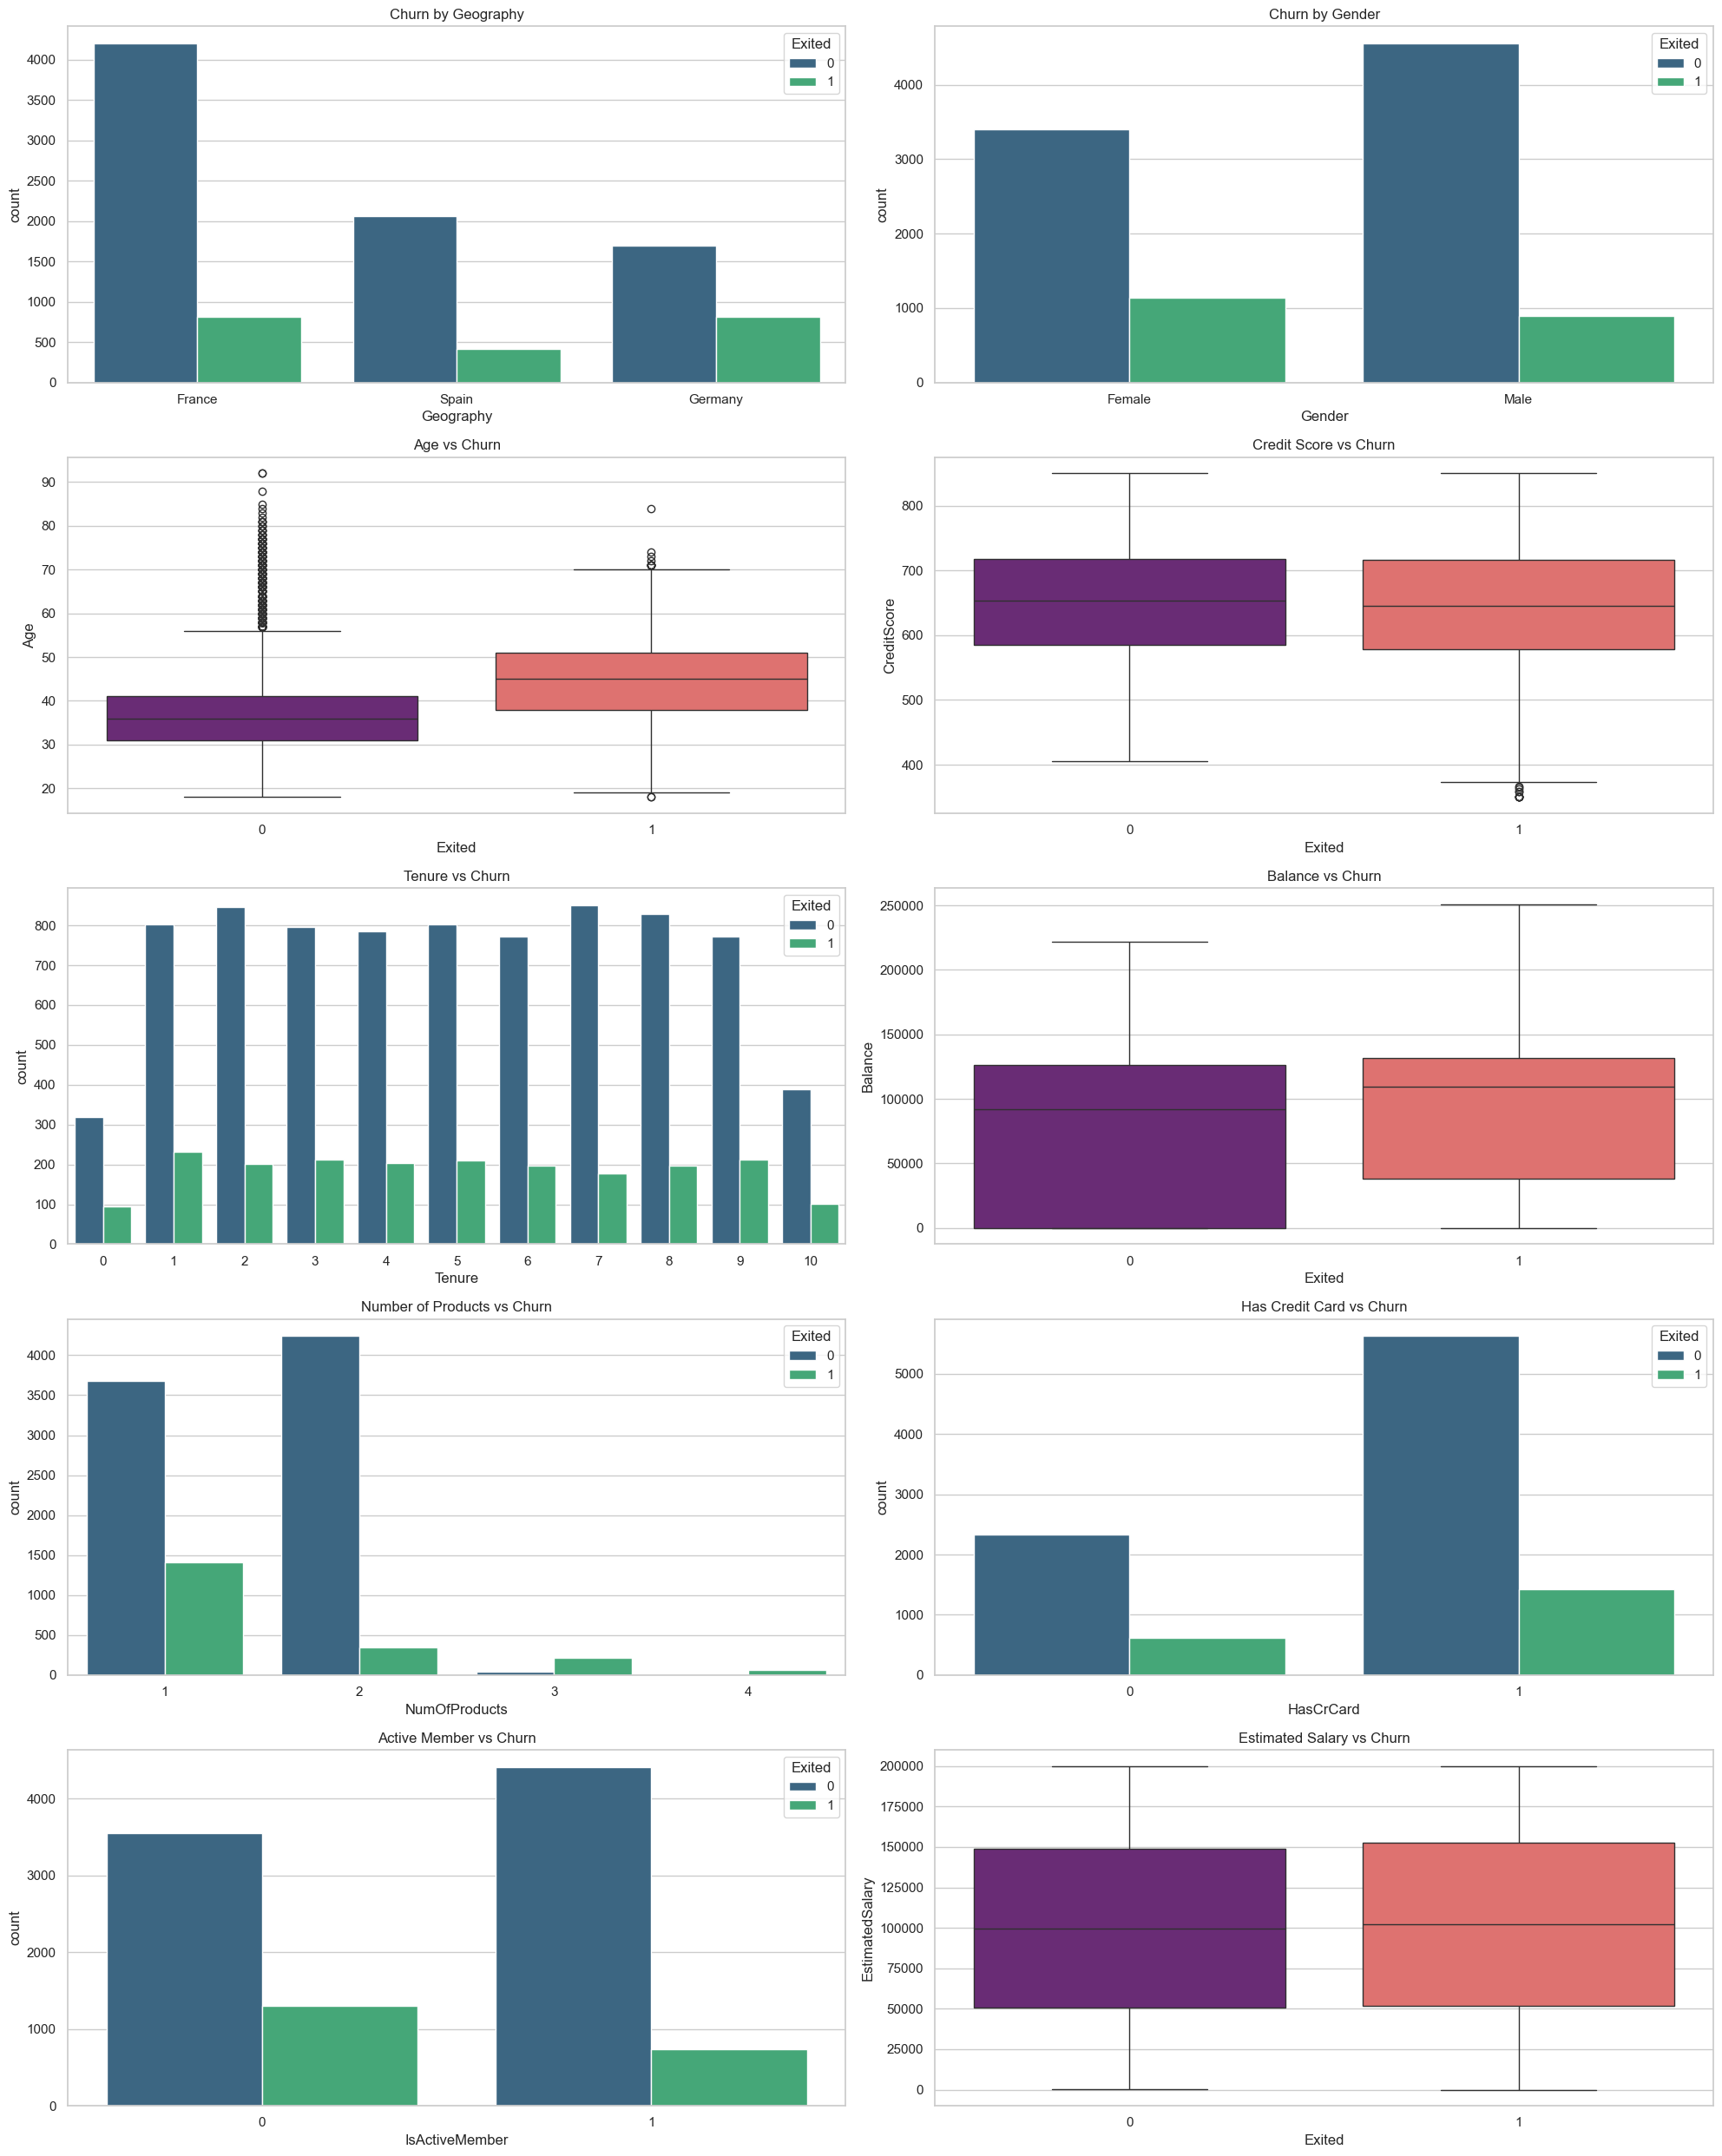

In [79]:
# Create a figure with a grid of subplots for all features
plt.figure(figsize=(20, 25))

# 1. Geography vs Churn (Categorical)
plt.subplot(5, 2, 1)
sns.countplot(x='Geography', hue='Exited', data=df, palette='viridis')
plt.title('Churn by Geography')

# 2. Gender vs Churn (Categorical)
plt.subplot(5, 2, 2)
sns.countplot(x='Gender', hue='Exited', data=df, palette='viridis')
plt.title('Churn by Gender')

# 3. Age vs Churn (Numerical - Use Boxplot)
plt.subplot(5, 2, 3)
sns.boxplot(x='Exited', y='Age', data=df, hue='Exited', palette='magma', legend=False)
plt.title('Age vs Churn')

# 4. Credit Score vs Churn (Numerical)
plt.subplot(5, 2, 4)
sns.boxplot(x='Exited', y='CreditScore', data=df, hue='Exited', palette='magma', legend=False)
plt.title('Credit Score vs Churn')

# 5. Tenure vs Churn (Discrete)
plt.subplot(5, 2, 5)
sns.countplot(x='Tenure', hue='Exited', data=df, palette='viridis')
plt.title('Tenure vs Churn')

# 6. Balance vs Churn (Numerical)
plt.subplot(5, 2, 6)
sns.boxplot(x='Exited', y='Balance', data=df, hue='Exited', palette='magma', legend=False)
plt.title('Balance vs Churn')

# 7. NumOfProducts vs Churn (Discrete)
plt.subplot(5, 2, 7)
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='viridis')
plt.title('Number of Products vs Churn')

# 8. HasCrCard vs Churn (Binary)
plt.subplot(5, 2, 8)
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='viridis')
plt.title('Has Credit Card vs Churn')

# 9. IsActiveMember vs Churn (Binary)
plt.subplot(5, 2, 9)
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='viridis')
plt.title('Active Member vs Churn')

# 10. EstimatedSalary vs Churn (Numerical)
plt.subplot(5, 2, 10)
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, hue='Exited', palette='magma', legend=False)
plt.title('Estimated Salary vs Churn')

plt.tight_layout()
plt.show()

## Analysis of Relationships and Business Trends
1. High-Impact Drivers (The "Early Warning" Signals)
Based on the multi-feature analysis, these are the strongest indicators of a customer's likelihood to churn:

Age vs. Churn: There is a distinct difference in the age profile. Customers who stay have a median age of ~36, while those who exit have a median age of ~45. This suggests that our older customer segment is significantly more at risk.

Geography: Germany shows a disproportionately high churn rate. While France has the most customers, the ratio of "Exited" to "Stayed" in Germany is nearly 1:1, indicating a major service or competitive issue in that region.

Number of Products: Customers with 3 or 4 products have a near-100% churn rate. This counter-intuitive finding suggests that as customers deepen their relationship beyond two products, they may encounter friction or dissatisfaction with service complexity.

Active Membership: Non-active members (IsActiveMember = 0) are much more likely to exit. Engagement is a primary defense against churn.

2. Financial and Behavioral Factors
Balance: Customers with higher account balances appear slightly more prone to churning. This indicates we are failing to retain our "high-value" depositors.

Gender: Female customers show a slightly higher churn rate compared to male customers.

Credit Score: Interestingly, the distribution of credit scores is almost identical for both groups, suggesting that financial health (credit-wise) is not a primary driver for leaving this bank.

3. Implications for Modeling
Feature Selection: I will prioritize Age, Geography, NumOfProducts, and IsActiveMember as they show the most significant variance between the two groups.

Assumptions: I assume that these historical trends in Germany and among older demographics will continue, making them valid predictors for our system.

## Deeper Feature Analysis

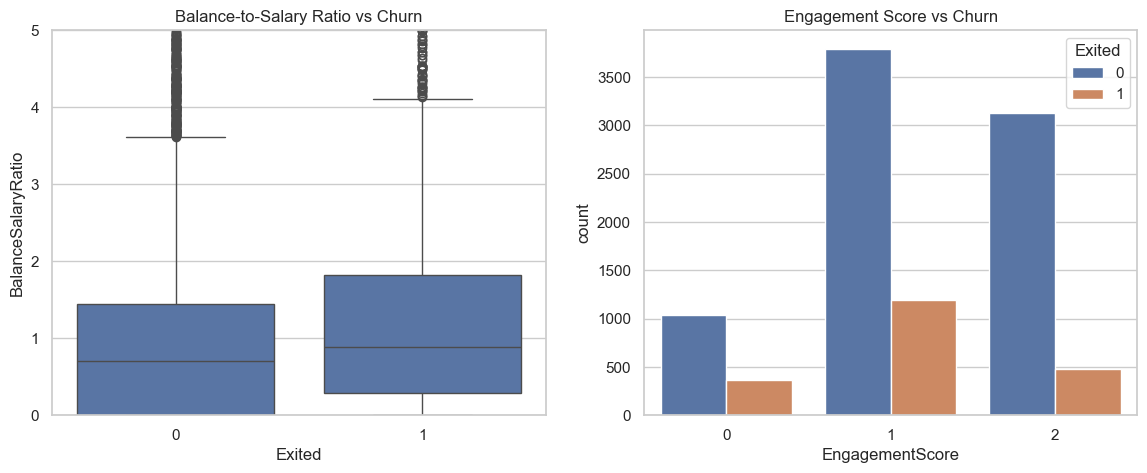

In [80]:
## Clean data
# Create temporary combined features for testing
df_test = df.copy()

# 1. Financial Depth (Balance to Salary Ratio)
df_test['BalanceSalaryRatio'] = df_test['Balance'] / (df_test['EstimatedSalary'] + 1) # +1 to avoid division by zero

# 2. Engagement Score (Has Credit Card + Is Active Member)
# Score 0: No card, inactive | Score 1: One of the two | Score 2: Has card and is active
df_test['EngagementScore'] = df_test['HasCrCard'] + df_test['IsActiveMember']

# Visualize the new correlations
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='BalanceSalaryRatio', data=df_test)
plt.ylim(0, 5) # Zoom in to see the bulk of the data
plt.title('Balance-to-Salary Ratio vs Churn')

plt.subplot(1, 2, 2)
sns.countplot(x='EngagementScore', hue='Exited', data=df_test)
plt.title('Engagement Score vs Churn')

plt.show()

## Analysis & Rationale: Advanced Feature Interactions

1. Balance-to-Salary Ratio vs. Churn
    While account balance alone showed some correlation, I hypothesized that a customer's financial depth—how much of their estimated salary they maintain in our bank—would be a more nuanced indicator of loyalty or flight risk

    The boxplot shows a higher median and a much wider distribution of ratios for customers who exited (1) compared to those who stayed (0)

    This confirms that customers who keep a higher proportion of their wealth in our bank are actually more likely to churn. This "high-value paradox" is a critical discovery for our early warning system; it suggests that our most profitable depositors are the ones most likely to be dissatisfied or targeted by competitors



2. Engagement Score vs. Churn
    Individual features like HasCrCard and IsActiveMember appeared somewhat weak on their own. I combined them into a composite Engagement Score ($0$ to $2$) to measure the "stickiness" of a customer's relationship with the bank

    The chart shows a dramatic drop in the churn ratio for customers with an Engagement Score of 2, which means they are both active and hold a credit card

    High engagement serves as a significant anchor for retention. As a founder, this suggests our system should not just flag risks, but our business strategy should actively encourage customers to reach "Score 2" status to reduce churn probability.3. Conclusion for Data PreparationRationale: These insights justify the creation of Engineered Features in the next phase. By transforming raw data into these high-impact interactions, we provide the machine learning model with clearer signals to improve its predictive power

# 3. Data Preparation

## 3.1 Data Cleaning

In [81]:
# RowNumber, CustomerId, Surname: No correlation (IDs)
# Tenure: No significant variance in churn rates (as observed in 2.3.2)
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname', 'Tenure']
df = df.drop(columns=columns_to_drop)

# Check for any missing values one last time before moving on (safety check even though it was ran already earlier)
print("Missing values per column:")
print(df.isnull().sum())

# View the cleaned structure
print("\nCleaned Dataframe Structure:")
df.head()

Missing values per column:
CreditScore        0
Geography          0
Gender             0
Age                0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Cleaned Dataframe Structure:


,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0


In [82]:
# 3.1.2 Encoding Categorical Variables
# Turning Gender into binary (0 and 1)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Turning Geography into numerical columns
# We use drop_first=True to avoid redundant data (the Dummy Variable Trap)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Final check of the 'cleaned' numerical dataframe
df.head()

,CreditScore,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,125510.82,1,1,1,79084.10,0,False,True


In [83]:
# Display a summary of the dataframe, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(7)
memory usage: 722.8 KB


## Thought Process

1. The reason why i used 'df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Tenure'])'
is to remove RowNumber, CustomerId, and Surname because they are high-cardinality identifiers that do not contain behavioral patterns. Including them would lead to "overfitting," where the model memorizes specific records instead of learning general churn signals. Tenure was also excluded because in an earlier chart, it showed that the churn count was almost consistent at 20% all across years 1 to 9, making it a noisy feature with little predictive value for this specific dataset.

2. Since the Gender and Geography features were originally Strings, they were incompatible with scikit-learn's mathematical requirements. 
* For the 'Gender' feature, I used binary mapping (Female=0, Male=1) to convert the strings into integers while keeping the dataset memory-efficient.

* For the 'Geography' feature, I could not drop this feature as Germany showed a significantly higher churn risk. I used One-Hot Encoding with 'drop_first=True' to represent the three countries numerically without creating a false ranking between them and to avoid multicollinearity.


Updated Dataframe Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(7)
memory usage: 722.8 KB


,CreditScore,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,125510.82,1,1,1,79084.10,0,False,True
9995,771,1,39,0.00,2,1,0,96270.64,0,False,False
9996,516,1,35,57369.61,1,1,1,101699.77,0,False,False
9997,709,0,36,0.00,1,0,1,42085.58,1,False,False
9998,772,1,42,75075.31,2,1,0,92888.52,1,True,False
9999,792,0,28,130142.79,1,1,0,38190.78,0,False,False


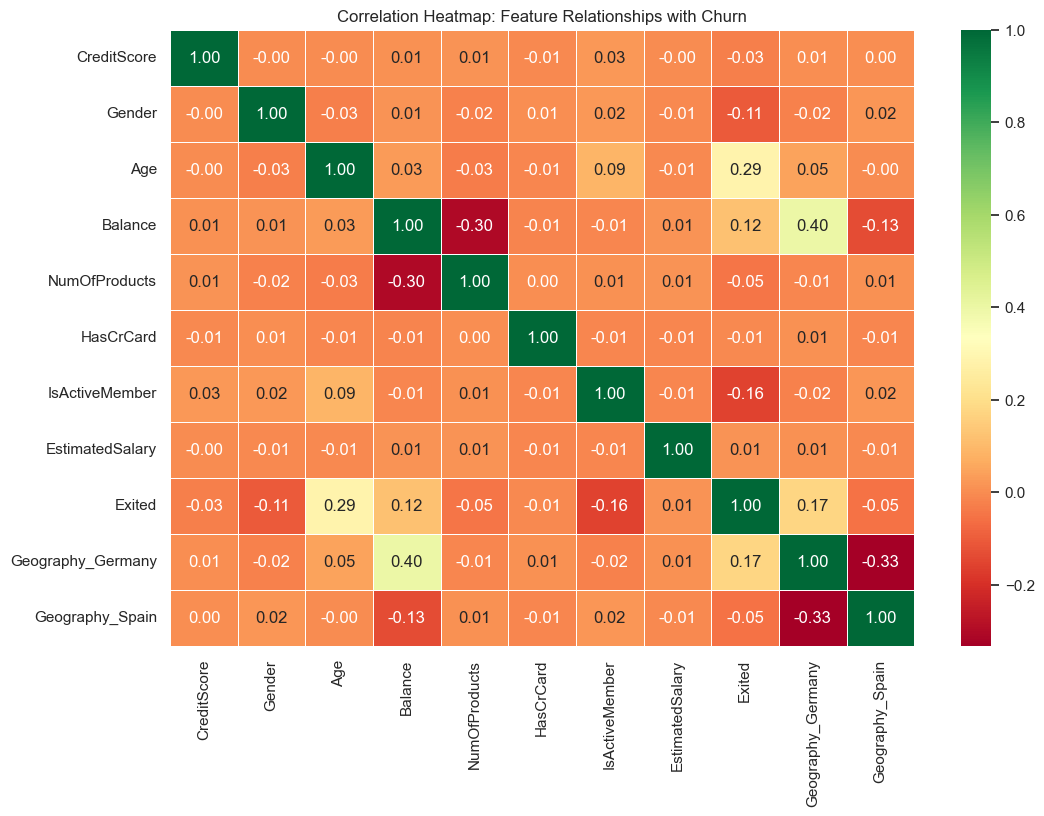

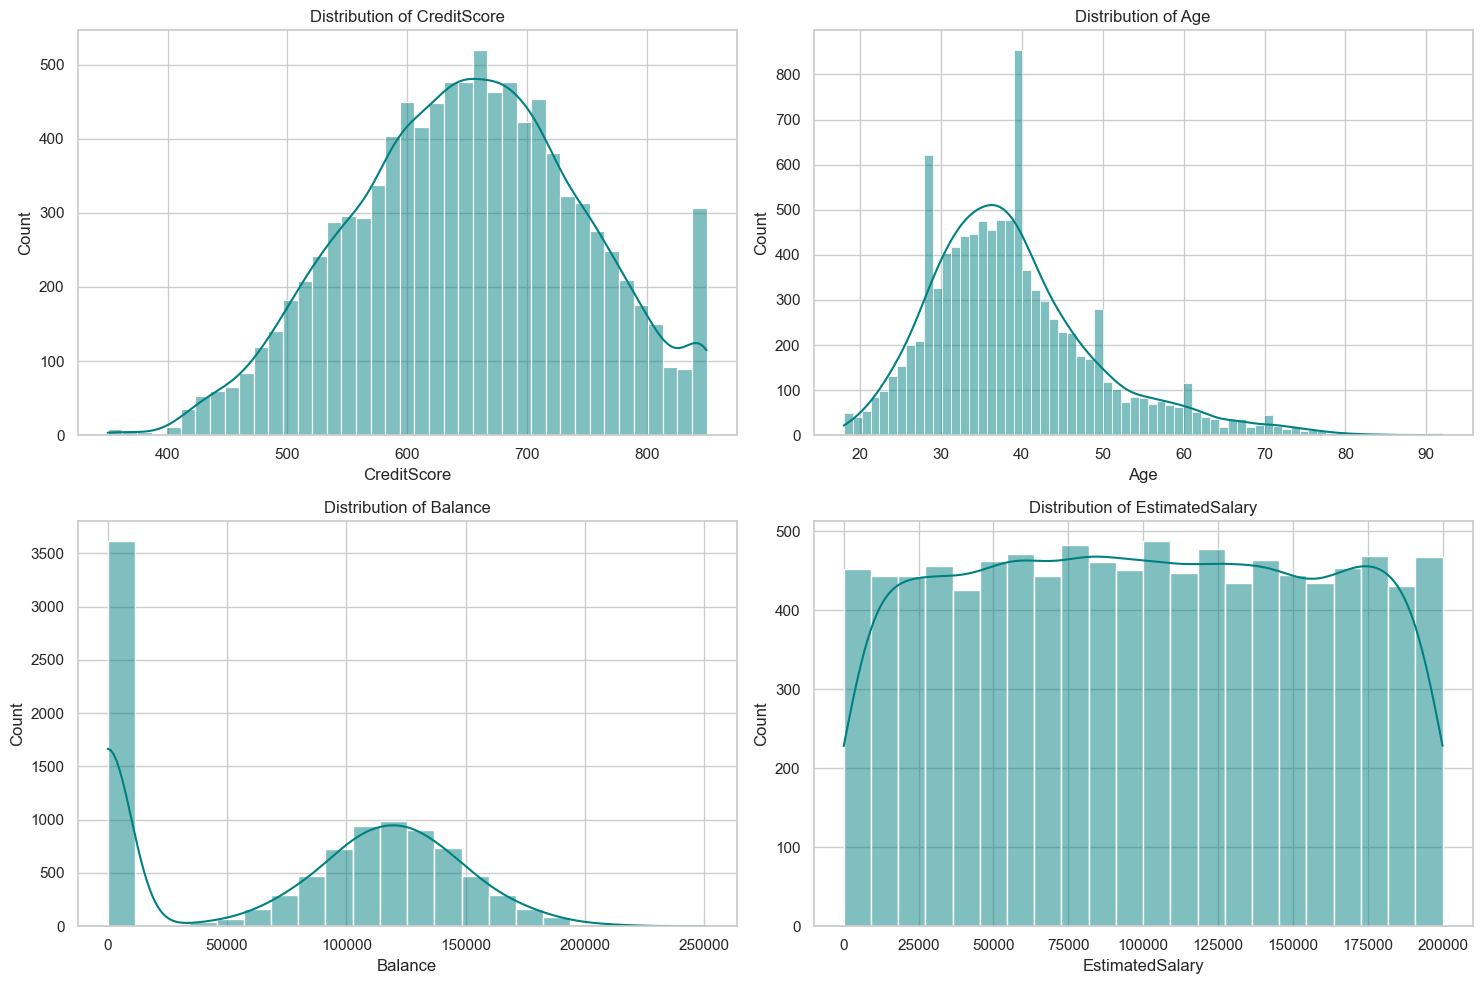

In [84]:
## Updated EDA after Cleaning
print("Updated Dataframe Info")
df.info()

# first and last 5 rows 
display(pd.concat([df.head(5), df.tail(5)]))

# Correlation Heatmap
# This shows how strongly each numerical feature relates to 'Exited'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
# calculates correlation on all columns now that they are numerical
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Feature Relationships with Churn')
plt.show()

# This helps to visualise the different scales (e.g., Age vs Balance) before they are scaled
cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Thought Process
 The correlation heatmap shows that no single feature has a "strong" linear relationship (above 0.5) with the target variable Exited. The highest positive correlation is Age (\approx 0.28), and the highest negative correlation is IsActiveMember (\approx -0.16).
 
 This lack of strong linear correlation suggests that churn is a multi-faceted problem where features interact in non-linear ways. This discovery justifies my choice to experiment with non-linear algorithms like Random Forest rather than relying solely on simple linear models, as they are better equipped to capture the complex, overlapping signals that lead to customer churn.

## 3.2 Train-Test Split

In [90]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# 80/20 Split
# 'stratify=y' ensures the 20% churn ratio is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} rows")
print(f"Testing set: {X_test.shape[0]} rows")

Training set: 8000 rows
Testing set: 2000 rows


# 4. Modelling

### 4.2 Train Model

In [91]:
## Initialise and train model
from sklearn.ensemble import RandomForestClassifier

# 4.2 Initialise and train model

# implementing 'Cost-Sensitive Learning'
# This ensures the model treats the 20% of churners as more important than the 80% who stay
rf_model = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=42
)

# Training the model
rf_model.fit(X_train, y_train)

print("Model trained using Cost-Sensitive Learning (class_weight='balanced')")

Model trained using Cost-Sensitive Learning (class_weight='balanced')


## Thought Process on using balanced class weight parameter

I have chosen the Random Forest Classifier because it is a non-linear ensemble method. Since the heatmap showed no strong linear correlations, a tree-based model is better suited to find the complex if-then interactions that lead to churn. Instead of deleting data through undersampling or inventing fake data with synthetic techniques, I am implementing cost-sensitive learning by using the balanced class weight parameter. This handles the eighty twenty imbalance by mathematically increasing the penalty for misclassifying the exited group. This approach forces the model to prioritize recall during its learning phase, which is the primary objective of our early warning system.

# 5. Model Evaluation

In [87]:
## Evaluate model


In [88]:
## New data

## Predict


## Iterative model development


In [89]:
## Further feature engineering / feature selection